- Title: Convert an Image to Differnt Modes Using Pillow in Python
- Slug: python-pillow-image-convert
- Date: 2020-03-11 21:00:59
- Category: Computer Science
- Tags: programming, Python, Pillow, computer vision, CV, image, PIL, black and white, grayscale, mode, RGBA, RGB
- Author: Ben Du
- Modified: 2020-03-11 21:00:59


In [1]:
import numpy as np
from PIL import Image, ImageOps

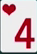

In [2]:
img = Image.open("../../home/media/poker/4h.png")
img

## Comments

1. You can use the method `Image.convert` to convert a `PIL.Image` to different modes.
    
2. `ImageOps.grayscale(img)` is equivalent to `img.convert("L")`.
    As a matter of fact,
    `ImageOps.grayscale(img)` directly calls `img.convert("L")`
    according to [the implementation](https://github.com/python-pillow/Pillow/blob/master/src/PIL/ImageOps.py#L462).

## Gray Scale - "L" Mode

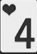

In [14]:
ImageOps.grayscale(img)

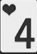

In [16]:
img.convert("L")

## Black-and-White - "1" Mode

By default, dithering is applied (white noisies are added).

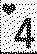

In [25]:
img.convert("1")

You can disable dithering with the option `dither=False`.

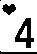

In [18]:
img_bw = img.convert("1", dither=False)
img_bw

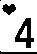

In [19]:
img_bw.convert("1", dither=False)

When a black-and-white image is converted to a numpy array,
a 2-dimensional array (instead of 3-dimensional) is returned.

In [22]:
np.array(img_bw)

array([[False,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

You can also use Pillow to convert an image to other (colorfull) modes. 
For more details, 
please refer to 
[Modes of the Method Image.convert](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes)
.

In [26]:
!wget https://i.imgur.com/mB96s.png

--2020-02-16 11:00:53--  https://i.imgur.com/mB96s.png
Resolving i.imgur.com (i.imgur.com)... 127.0.0.1
Connecting to i.imgur.com (i.imgur.com)|127.0.0.1|:443... failed: Connection refused.


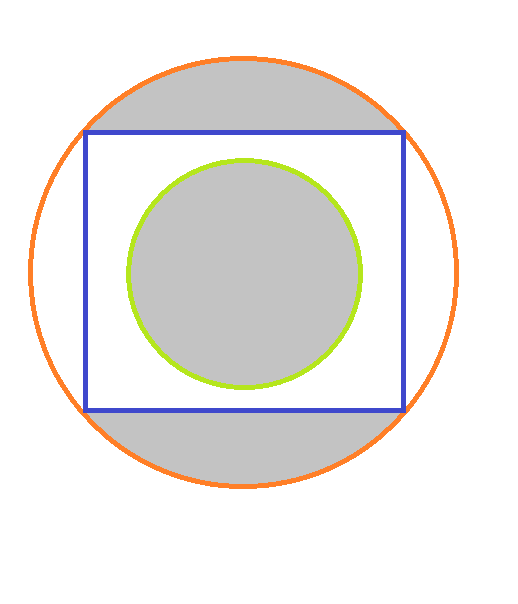

In [27]:
Image.open("mB96s.png")

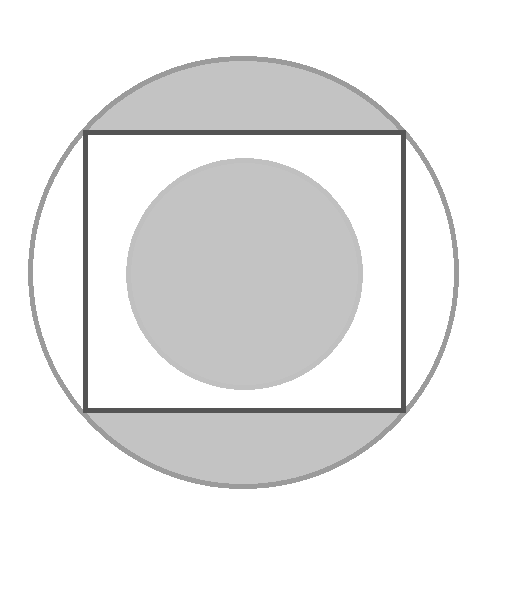

In [30]:
Image.open("mB96s.png").convert("L")

In [34]:
def binarize(arr2d, threshold=200):
    arr2d = arr2d.copy()
    nrow, ncol = arr2d.shape
    for i in range(nrow):
        for j in range(ncol):
            if arr2d[i, j] > threshold:
                arr2d[i, j] = 255
            else:
                arr2d[i, j] = 0
    return arr2d

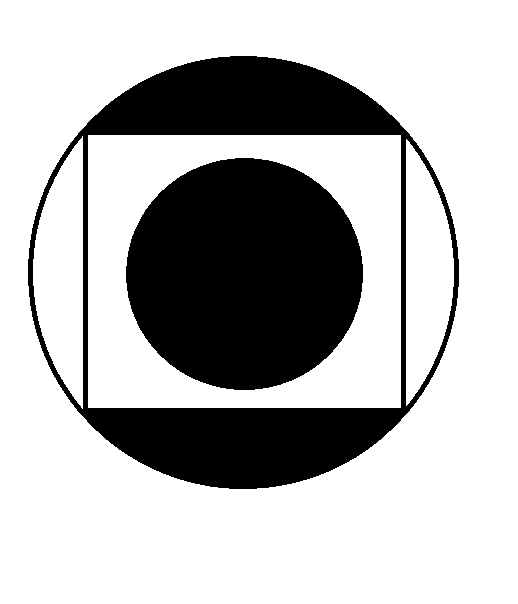

In [35]:
img_gs = Image.open("mB96s.png").convert("L")
Image.fromarray(binarize(np.array(img_gs)))

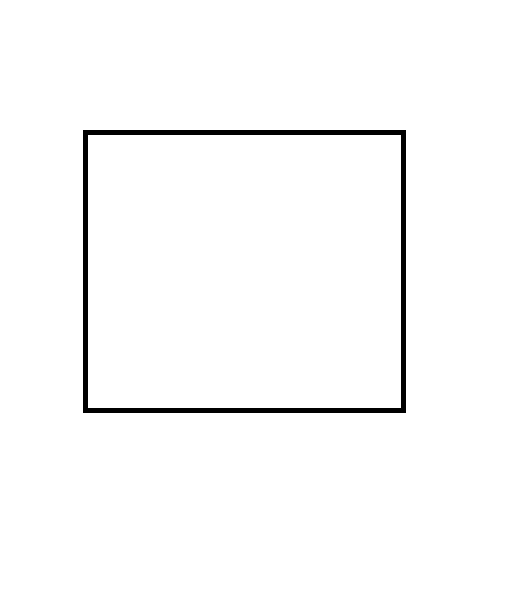

In [36]:
Image.open("mB96s.png").convert("1", dither=False)

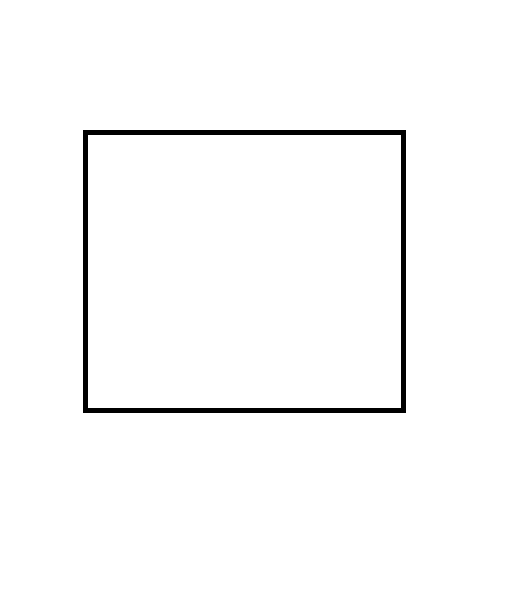

In [37]:
Image.open("mB96s.png").convert("L").convert("1", dither=False)

## Convert a RGBA Image to RGB

In [4]:
img_rgba = img.convert("RGBA")
img_rgba.mode

'RGBA'

In [5]:
img_rgb = img_rgba.convert("RGB")
img_rgb.mode

'RGB'

## References

http://www.blog.pythonlibrary.org/2017/10/11/convert-a-photo-to-black-and-white-in-python/

https://brohrer.github.io/convert_rgb_to_grayscale.html

https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python

https://stackoverflow.com/questions/9506841/using-python-pil-to-turn-a-rgb-image-into-a-pure-black-and-white-image

[Modes of the Method Image.convert](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes)

[Source Code of the ImageOps Class](https://github.com/python-pillow/Pillow/blob/master/src/PIL/ImageOps.py)

[Source Code of the Image Class](https://github.com/python-pillow/Pillow/blob/master/src/PIL/Image.py)

https://www.rapidtables.com/web/color/white-color.html

https://www.rapidtables.com/web/color/black-color.html